In [47]:
from src_dir import mk_laplace_2d, mk_laplace_2d_Tensor
import numpy as np

# Set dimension of the NxN grid used
# Note: For optimal performance, the neural network "cnn_collectionOnline2D.py"
# can be tweaked with appropriate kernel dilations, however the code should
# still work and yield resuluts for any dimension of input provided
dim = 80

# Default initial guess used for direct un-preconditioned GMRES is the zero
# solution
x0 = np.squeeze(np.zeros((dim,dim)))
x0Type = 'Zero Solution 2D'

# Set tolerances for GMRES solver
e = 1e-10

# Restarted GMRES parameters
nmax_iter = 10
restart   = 1000

# Create domain [-1,1]x[-1,1]
# Define grid values at midpoints of cartesian grid
DomainL = -1.0
DomainR =  1.0
dx = (DomainR-DomainL)/(dim-1)
x1 = np.linspace(DomainL+dx,DomainR-dx,dim)
x2 = np.linspace(DomainL+dx,DomainR-dx,dim)
X, Y = np.meshgrid(x1, x2, sparse=False, indexing='ij')
Area = (dx*(dim-1))**2

# Create 2D laplace opertor as a stencil opertor for a N-cell 2D grid
# Can be found in linop.py in src_di
A = mk_laplace_2d(dim, dim, bc="dirichlet", xlo=0, xhi=0, ylo=0, yhi=0)
AType = '2D Laplacian'

# Total number of steps in simulation
n_steps = 100

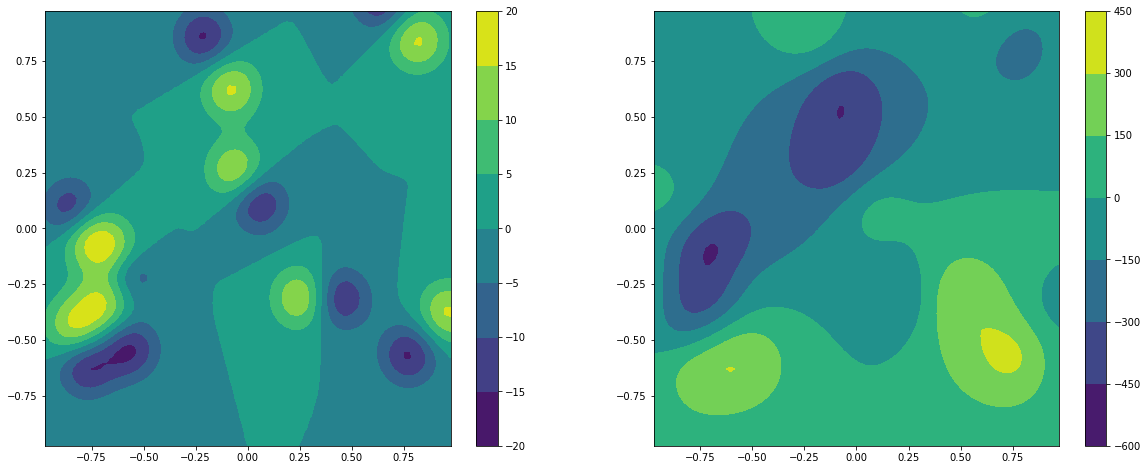

In [48]:
# A sample of the RHS used in the demo
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D  
from src_dir import Gauss_pdf_2D, GMRES

def dipole():
    # Compute dipole
    xloc      = np.random.uniform(x1[0], x1[-1])
    yloc      = np.random.uniform(x2[0], x2[-1])
    xlocShift = np.random.uniform(-0.25, 0.25)
    ylocShift = np.random.uniform(-0.25, 0.25)
    AmplitudeFactor  = 1 # np.random.uniform(1,10)
    AmplitudeFactor2 = -AmplitudeFactor
    sigma = .1 # 0.07*np.random.uniform(0.9,1.1)
    b     = AmplitudeFactor*Gauss_pdf_2D(X, Y, xloc, yloc, sigma) \
          + AmplitudeFactor2*Gauss_pdf_2D(X, Y, xloc + xlocShift, yloc + ylocShift, sigma)

    # Compute random field
    # Field = np.random.normal(loc=0.0, scale=1.0, size=(dim,dim))
    # Field = AmplitudeFactor*np.random.normal(loc=0.0, scale=0.0, size=(dim, dim))
    return b

b = dipole() + dipole() + dipole() + dipole() + dipole() + dipole() + dipole() + dipole() + dipole()

Out = GMRES(A, b, x0, e, nmax_iter, restart, True)

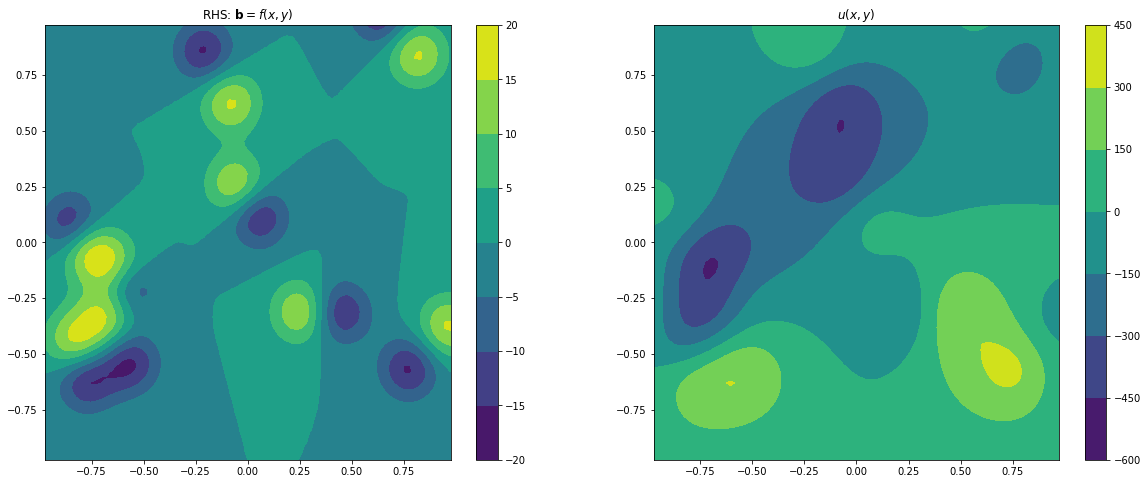

In [89]:
fig, ax = pp.subplots(1, 2, figsize=(20,8))

p = ax[0].contourf(X,Y,b)
pp.colorbar(p, ax=ax[0])

p = ax[1].contourf(X, Y, Out[-1])
pp.colorbar(p, ax=ax[1])

ax[0].set_title("RHS: $\mathbf{b}=f(x,y)$")
ax[1].set_title("$u(x,y)$")

pp.savefig("poisson.pdf")